Аномалии на основе метода максимального правдоподобия

In [224]:
import numpy as np
from scipy.stats import norm

np.random.seed(0)
# Сгенерируем одномерные данные для примера
data = np.concatenate([np.random.normal(loc=0, scale=1, size=100),
                       np.random.normal(loc=5, scale=1, size=20)])

# Оценка параметров нормального распределения
mu, sigma = norm.fit(data)

# Вычисление правдоподобия для каждого значения
likelihoods = norm.pdf(data, loc=mu, scale=sigma)

# Задаем пороговое значение для определения аномалий
threshold = 0.01

# Определение аномалий
anomalies = data[likelihoods < threshold]

print("Аномалии:", anomalies)

Аномалии: [6.74957674 6.24774207 7.14514913]


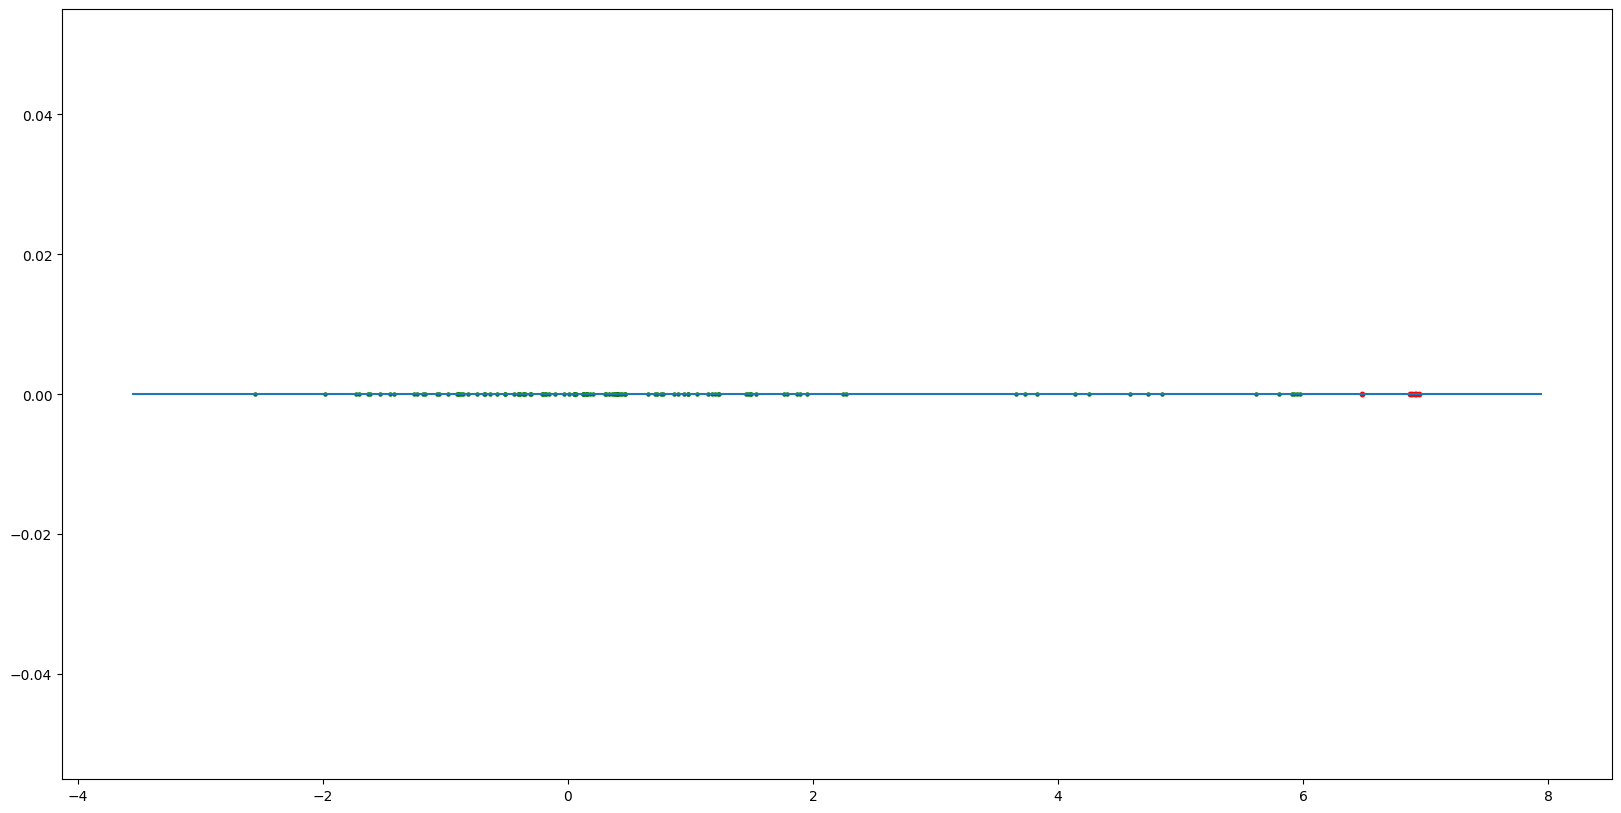

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.hlines(0, xmin=min(data)-1, xmax=max(data)+1)

plt.scatter(data, [0] * len(data), c="green", s=5)
plt.scatter(anomalies, [0] * len(anomalies), c="red", s=10)

Аномалии на основе построение гистограмм

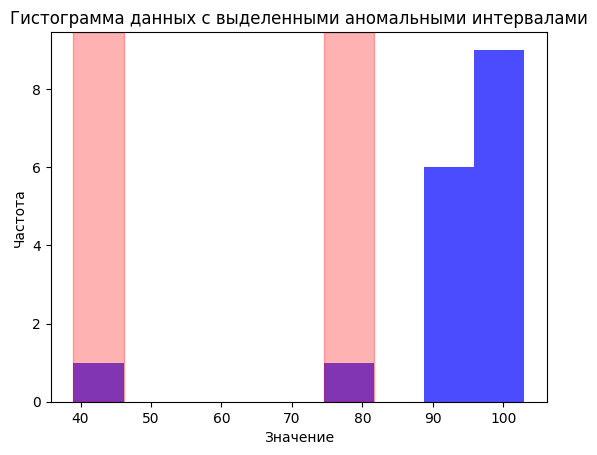

In [180]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([91, 39, 92, 91, 101, 92, 81, 100, 101, 103, 101, 91, 93, 100, 101, 100, 100])

# Построение гистограммы
plt.hist(data, bins='auto', color='blue', alpha=0.7)

# Определение порогового значения для аномальных интервалов
threshold = 2

# Определение интервалов с низким количеством значений (аномальных интервалов)
hist, bins = np.histogram(data, bins='auto')
anomalous_intervals = bins[np.where(np.logical_and(hist < threshold, hist>0))]

anomalies = [data[np.logical_and(data >= interval,data <= interval + np.diff(bins)[0])] for interval in anomalous_intervals]
anomalies = [a[0] for a in anomalies]
# Визуализация аномальных интервалов
for interval in anomalous_intervals:
    plt.axvspan(interval, interval + np.diff(bins)[0], color='red', alpha=0.3)

# Настройка осей и заголовка графика
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных с выделенными аномальными интервалами')

# Отображение графика
plt.show()


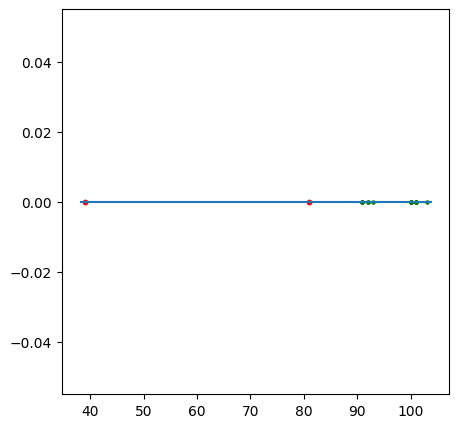

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.hlines(0, xmin=min(data)-1, xmax=max(data)+1)

plt.scatter(data, [0] * len(data), c="green", s=5)
plt.scatter(anomalies, [0] * len(anomalies), c="red", s=10)